In [1]:
import h5py

images = h5py.File('data/lin_image_shading_mask_all_1.hdf5', 'r')['default']

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

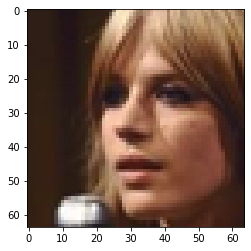

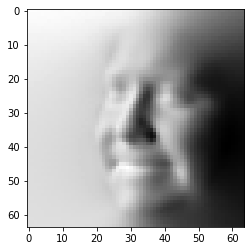

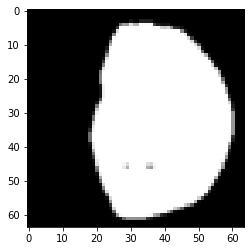

In [3]:
meanPixel = np.array([0.35064762, 0.21667774, 0.16786481])

idx = 0

x = images[idx][0:3]
x[0] += meanPixel[0]
x[1] += meanPixel[1]
x[2] += meanPixel[2]
y = images[idx][3]
z = images[idx][4]
npx = np.power(np.array(x),(1/2.2))
npy = np.array(y)
npz = np.array(z)
npx = np.transpose(npx, (1, 2, 0))
plt.figure()
plt.imshow(npx)
plt.figure()
plt.imshow(npy, cmap='gray')
plt.figure()
plt.imshow(npz, cmap='gray')


In [4]:
datanp = np.array(images)

In [5]:
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

device = 'cpu'
traindata_proportion = 0.9

data_tensor = torch.from_numpy(datanp).to(device)
init_dataset = TensorDataset(data_tensor) 
lengths = [int(len(init_dataset)*traindata_proportion), len(init_dataset) - 
           int(len(init_dataset)*traindata_proportion),] 
subset_train, subset_val = random_split(init_dataset, lengths)


In [6]:
dataloaders = {
    'train': torch.utils.data.DataLoader(subset_train, batch_size=32, shuffle=True, num_workers=0),
    'val': torch.utils.data.DataLoader(subset_val, batch_size=8, shuffle=False, num_workers=0)
}

In [107]:
import scipy.io as sio

Newskincolour = sio.loadmat('util/Newskincolour.mat')['Newskincolour']

Newskincolour = Newskincolour.transpose((2, 0, 1))
skinColor = torch.tensor(Newskincolour)
skinColor = torch.reshape(skinColor, (1, 33, 256, 256))

In [9]:
illA = sio.loadmat("util/illumA.mat")
illA = illA['illumA'][0][0]

illA = illA / illA.sum()

illA = torch.tensor(illA)

In [10]:
s0 = torch.Tensor([
    94.80,
    104.80,
    105.90,
    96.80,
    113.90,
    125.60,
    125.50,
    121.30,
    121.30,
    113.50,
    113.10,
    110.80,
    106.50,
    108.80,
    105.30,
    104.40,
    100.00,
    96.00,
    95.10,
    89.10,
    90.50,
    90.30,
    88.40,
    84.00,
    85.10,
    81.90,
    82.60,
    84.90,
    81.30,
    71.90,
    74.30,
    76.40,
    63.30
])

s1 = torch.Tensor([
    43.40,
    46.30,
    43.90,
    37.10,
    36.70,
    35.90,
    32.60,
    27.90,
    24.30,
    20.10,
    16.20,
    13.20,
    8.60,
    6.10,
    4.20,
    1.90,
    0.00,
    -1.60,
    -3.50,
    -3.50,
    -5.80,
    -7.20,
    -8.60,
    -9.50,
    -10.90,
    -10.70,
    -12.00,
    -14.00,
    -13.60,
    -12.00,
    -13.30,
    -12.90,
    -10.60
])

s2 = torch.Tensor([
    -1.1,
    -0.5,
    -0.7,
    -1.2,
    -2.6,
    -2.9,
    -2.8,
    -2.6,
    -2.6,
    -1.8,
    -1.5,
    -1.3,
    -1.2,
    -1.0,
    -0.5,
    -0.3,
    0.0,
    0.2,
    0.5,
    2.1,
    3.2,
    4.1,
    4.7,
    5.1,
    6.7,
    7.3,
    8.6,
    9.8,
    10.2,
    8.3,
    9.6,
    8.5,
    7.0
])


def chromacity(t):
    t = t * 21000
    t = t + 4000
    
    x1 = -4.6070 * (10 ** 9) / (t ** 3) + (2.9678 * 10 ** 6) / (t ** 2) + (0.09911 * 10 ** 3) / t + 0.244063
    x2 = -2.0064 * (10 ** 9) / (t ** 3) + (1.9018 * 10 ** 6) / (t ** 2) + (0.24748 * 10 ** 3) / t + 0.237040
        
    x = (t <= 7000) * x1 + (t > 7000) * x2
        
    y = -3 * x ** 2 + 2.87 * x - 0.275
    
    return x, y

def illuminanceD(temp):
    x, y = chromacity(temp)
    
    m = 0.0241 + 0.2562 * x -0.7341 * y
    m1 = (-1.3515 - 1.7703 * x + 5.9114 * y) / m
    m2 = (0.0300 - 31.4424 * x + 30.0717 * y) / m
    
    s = s0 + m1 * s1 + m2 * s2
    return s / torch.reshape(torch.sum(s, 1), (-1, 1))

In [109]:
illF = torch.Tensor(sio.loadmat('util/illF')['illF'])[0]

illF = illF / torch.reshape(torch.sum(illF, 0), (1, 12))

(2, 99)
[0.1667129  0.14473045]
[0.29197902 0.25347922]
[2.12161456 1.97679594]
[1.10407201e-02 1.66893660e-02 3.15438448e-02 3.56276567e-02
 2.76012955e-02 2.35880054e-02 2.28123341e-02 2.90796533e-02
 3.75733278e-02 4.00440321e-02 4.92719003e-02 7.08696577e-02
 1.06282351e-01 1.41957364e-01 1.21043849e-01 1.20753030e-01
 1.50045489e-01 2.81812166e-01 6.53970056e-01 9.65044768e-01
 9.37153066e-01 8.43204128e-01 7.07853309e-01 6.29338501e-01
 5.02509503e-01 4.01830118e-01 2.70377398e-01 1.64413575e-01
 6.66287722e-02 2.13965526e-02 8.61571369e-03 4.73854565e-03
 3.09641041e-03 1.04823553e-02 1.98810340e-02 4.17267493e-02
 6.60756648e-02 8.38867585e-02 1.08440929e-01 1.51900080e-01
 2.63664461e-01 4.05796404e-01 4.87581518e-01 6.45693553e-01
 8.18969034e-01 9.10397171e-01 9.95765234e-01 9.13499939e-01
 8.82027403e-01 7.32153992e-01 6.35156982e-01 4.76244265e-01
 3.48955271e-01 2.02741638e-01 1.14648287e-01 6.38501518e-02
 4.80248768e-02 3.50234064e-02 2.63293280e-02 1.70423400e-02
 1.27

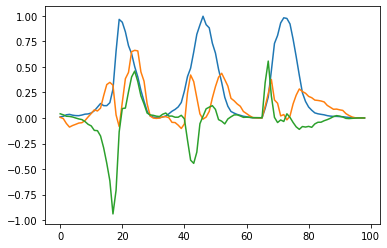

In [82]:
# from sklearn.decomposition import PCA

# n_components = 2

# pca = PCA(n_components)

# pcaComponents = np.zeros((3, 2, 33))
# pcaMeans = np.zeros((3, 33))

# Y = np.transpose(cameraSensitivityData, (2, 0, 1))

# for camera in range(28):
#     for channel in range(3):
#         Y[camera,channel] /= np.max(Y[camera,channel])

# Y = np.resize(Y, (28, 99))

# pca.fit(Y)

# pcaComponents = pca.components_ * np.resize(pca.singular_values_, (n_components, 1))

# print(pca.components_.shape)
# print(pca.explained_variance_)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)
# print(pca.mean_)

# plt.figure()
# plt.plot(pca.mean_)
# plt.plot(pcaComponents[0])
# plt.plot(pcaComponents[1])


In [110]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components)

pcaComponents = np.zeros((3, 2, 33))
pcaMeans = np.zeros((3, 33))

Y = np.transpose(cameraSensitivityData, (2, 0, 1))

for camera in range(28):
    for channel in range(3):
        Y[camera,channel] /= np.sum(Y[camera,channel]) # should use max

Y = np.resize(Y, (28, 99))

pca.fit(Y)

pcaComponents = pca.components_ * np.resize(pca.explained_variance_ ** 0.5, (n_components, 1))
pcaComponents[1] *= -1 # Done so that vector is on the same scale as matlab

# print(pca.components_.shape)
# print(pca.explained_variance_)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)
# print(pca.mean_)

# plt.figure()
# plt.plot(pca.mean_)
# plt.plot(pcaComponents[0] )
# plt.plot(pcaComponents[1] )

pcaMeans = torch.reshape(torch.tensor(pca.mean_), (1, 99)).float()
pcaComponents = torch.tensor(pcaComponents).permute(1, 0).float()

torch.Size([99, 2])

In [32]:
# import scipy.io as sio

# rgbData = sio.loadmat("util/rgbCMF.mat")
# cameraSensitivityData = np.array(list(np.array(rgbData['rgbCMF'][0])))

# from sklearn.decomposition import PCA

# n_components = 2

# pca = PCA(n_components)

# pcaComponents = np.zeros((3, 2, 33))
# pcaMeans = np.zeros((3, 33))

# for i, channel in enumerate(cameraSensitivityData):
#     pca.fit(channel.T)
#     pcaComponents[i] = pca.components_
#     pcaMeans[i] = pca.mean_
    
# pcaComponents = torch.reshape(torch.tensor(pcaComponents).permute(0, 2, 1), (99, 2)).float()
# pcaMeans = torch.reshape(torch.tensor(pcaMeans), (1, 99)).float()

# pcaMeans

tensor([[6.9341e-03, 1.0996e-02, 2.1814e-02, 2.5038e-02, 1.9534e-02, 1.6711e-02,
         1.6060e-02, 2.0277e-02, 2.5872e-02, 2.7195e-02, 3.3133e-02, 4.7128e-02,
         7.1537e-02, 9.4160e-02, 7.7757e-02, 7.6178e-02, 9.5353e-02, 1.8307e-01,
         4.4444e-01, 6.6242e-01, 6.4103e-01, 5.7240e-01, 4.8739e-01, 4.3507e-01,
         3.4987e-01, 2.7412e-01, 1.7686e-01, 1.0238e-01, 4.0500e-02, 1.3243e-02,
         5.4767e-03, 3.0210e-03, 1.9433e-03, 8.9619e-03, 1.7890e-02, 3.9411e-02,
         6.2938e-02, 8.0056e-02, 1.0371e-01, 1.4544e-01, 2.5366e-01, 3.9201e-01,
         4.7249e-01, 6.2634e-01, 7.9184e-01, 8.7877e-01, 9.5899e-01, 8.7856e-01,
         8.4769e-01, 7.0262e-01, 6.0873e-01, 4.5573e-01, 3.3317e-01, 1.9336e-01,
         1.0934e-01, 6.1004e-02, 4.5829e-02, 3.3253e-02, 2.4831e-02, 1.5717e-02,
         1.1192e-02, 6.1161e-03, 2.3763e-03, 1.1678e-03, 7.3997e-04, 4.6917e-04,
         7.7777e-02, 1.7054e-01, 3.8622e-01, 6.1366e-01, 6.8000e-01, 7.8500e-01,
         8.2648e-01, 8.2075e

In [105]:
import torch.nn as nn
import torch.nn.functional as F

channels = [3, 32, 64, 128, 256, 512]
lightVectorSize = 15
n_components = 2

# 3 convolutions, batchnorms, relus for each filter size
# max pool for each filter size except last

class Unet(nn.Module):
  def __init__(self):
    super(Unet, self).__init__()
    
    self.convolutions = nn.ModuleList()
    self.encoderBatchnorms = nn.ModuleList()
    size = 64
    for i in range(1, len(channels)):
        self.convolutions.append(nn.Conv2d(channels[i - 1], channels[i], 3, padding = 1))
        self.encoderBatchnorms.append(nn.BatchNorm2d(channels[i]))
        
        self.convolutions.append(nn.Conv2d(channels[i], channels[i], 3, padding = 1))
        self.encoderBatchnorms.append(nn.BatchNorm2d(channels[i]))
        
        self.convolutions.append(nn.Conv2d(channels[i], channels[i], 3, padding = 1))
        self.encoderBatchnorms.append(nn.BatchNorm2d(channels[i]))
        
        if i != len(channels) - 1:
            size //= 2
            
    self.low_resolution = size
    
    self.fc1 = nn.Linear(channels[-1] * size * size, channels[-1])
    self.batchnorm1 = nn.BatchNorm1d(channels[-1])
    self.fc2 = nn.Linear(channels[-1], channels[-1])
    self.batchnorm2 = nn.BatchNorm1d(channels[-1])
    self.fc3 = nn.Linear(channels[-1], lightVectorSize + n_components)
    
    self.decoderConvolutions = nn.ModuleList()
    self.decoderBatchnorms = nn.ModuleList()
    
    for outClass in range(4):
        convs = nn.ModuleList()
        bns = nn.ModuleList()
        for i in reversed(range(1, len(channels) - 1)):
            size *= 2

            convs.append(nn.Conv2d(channels[i] + channels[i + 1], channels[i], 3, padding = 1))
            bns.append(nn.BatchNorm2d(channels[i]))
            convs.append(nn.Conv2d(channels[i], channels[i], 3, padding = 1))
            bns.append(nn.BatchNorm2d(channels[i]))
            convs.append(nn.Conv2d(channels[i], channels[i], 3, padding = 1))
            bns.append(nn.BatchNorm2d(channels[i]))

        convs.append(nn.Conv2d(channels[1], 1, 3, padding = 1))
        
        self.decoderConvolutions.append(convs)
        self.decoderBatchnorms.append(bns)
    
  def forward(self, x):
    image = x[:,:3,:,:] # (B, 5, 64, 64) -> (B, 3, 64, 64)
    shading = x[:,3,:,:] # (B, 5, 64, 64) -> (B, 1, 64, 64)
    mask = x[:,4,:,:] # (B, 5, 64, 64) -> (B, 1, 64, 64)
    
    skipValues = []
    
    for convIndex in range(len(self.convolutions)):
        image = self.convolutions[convIndex](image)
        image = self.encoderBatchnorms[convIndex](image)
        image = F.relu(image)
        
        if convIndex % 3 == 2 and convIndex != len(self.convolutions) - 1:
            skipValues.append(torch.clone(image))
            image = F.max_pool2d(image, 2)
            
    skipValues.reverse()
            
    # (B, channels[-1], low_resolution, low_resolution) -> (B, channels[-1], * low_resolution *low_resolution)
    lighting = torch.reshape(image, (-1, self.low_resolution * self.low_resolution * channels[-1]))
    lighting = self.fc1(lighting)
    lighting = self.batchnorm1(lighting)
    lighting = F.relu(lighting)
    lighting = self.fc2(lighting)
    lighting = self.batchnorm2(lighting)
    lighting = F.relu(lighting)
    lighting = self.fc3(lighting)
    
    features = []
    
    for out in range(4):
        feature = torch.clone(image)
        
        for i in range(len(self.decoderConvolutions[out]) - 1):
            if i % 3 == 0:
                feature = F.interpolate(feature, scale_factor = 2)
                feature = torch.cat((feature, skipValues[i // 3]), 1)
                
            feature = self.decoderConvolutions[out][i](feature)
            feature = self.decoderBatchnorms[out][i](feature)
            feature = F.relu(feature)
            
        feature = self.decoderConvolutions[out][-1](feature)
        features.append(feature)
    
    lighting_parameters = lighting[:,:lightVectorSize]
    b = lighting[:,lightVectorSize:]
    
    mel, blood, shade, spec = features
    
    lighting_parameters = F.softmax(lighting_parameters, 1) # possibly exclude colortemp out of softmax
    weightA = lighting_parameters[:,0]
    weightA = torch.reshape(weightA, (-1, 1))
    weightD = lighting_parameters[:,1]
    weightD = torch.reshape(weightD, (-1, 1))
    fWeights = lighting_parameters[:,2:14]
    colorTemp = lighting_parameters[:,14]
    colorTemp = torch.reshape(colorTemp, (-1, 1))
    
    b = 6 * torch.sigmoid(b) - 3
    
    mel = -2 * torch.sigmoid(mel) + 1
    blood = -2 * torch.sigmoid(blood) + 1
    shade = torch.exp(shade)
    spec = torch.exp(spec)
    
    aLightVector = weightA * illA
    dLightVector = weightD * illuminanceD(colorTemp)
    fLightVector = F.linear(fWeights, illF)
    
    e = aLightVector + dLightVector + fLightVector
    eSums = torch.reshape(torch.sum(e, 1), (-1, 1))
    
    e = e / eSums
    
    S = F.linear(b, pcaComponents)
    S += pcaMeans
    
    S = F.relu(S)
    
    S = torch.reshape(S, (-1, 3, 33))
    
    lightColor = S * torch.reshape(e, (-1, 1, 33))
    lightColor = torch.sum(S, 2)
    
    spec = spec * torch.reshape(lightColor, (-1, 3, 1, 1)) # could be greater than one
    
    bioPhysicalLayer = torch.cat((mel, blood), 1).permute((0, 2, 3, 1))
    skinColorGrid = skinColor.repeat((bioPhysicalLayer.shape[0], 1, 1, 1))
    r_total = F.grid_sample(skinColorGrid, bioPhysicalLayer)
    
    print(r_total.shape)
    
    



In [106]:
net = Unet()

for x in dataloaders['train']:
    inp = x[0]
    
    net(inp)
    
    break

C:\Users\Arihant\.conda\envs\ml\lib\site-packages\torch\nn\functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


torch.Size([32, 256, 64, 64])


In [17]:
totalParams = 0

for p in net.parameters():
    totalParams += p.numel()
    
totalParams

28015701

In [18]:
import scipy.io as sio

rgbData = sio.loadmat("util/rgbCMF.mat")

In [19]:
cameraSensitivityData = np.array(list(np.array(rgbData['rgbCMF'][0])))

In [20]:
cameraSensitivityData.shape

# 28 cameras, size 33 vectors for rgb

(3, 33, 28)

In [21]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components)

pcaComponents = np.zeros((3, 2, 33))
pcaMeans = np.zeros((3, 33))

for i, channel in enumerate(cameraSensitivityData):
    pca.fit(channel.T)
    pcaComponents[i] = pca.components_
    pcaMeans[i] = pca.mean_

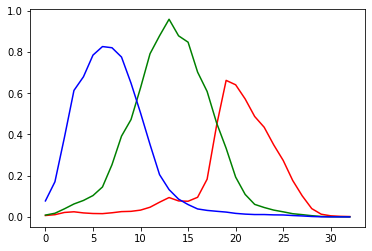

In [22]:
plt.plot(pcaMeans[0], color='red')
plt.plot(pcaMeans[1], color='green')
plt.plot(pcaMeans[2], color='blue')

In [23]:
aData = sio.loadmat("util/illumA.mat")
aData = aData['illumA']

In [24]:
aData[0][0]

array([ 14.708 ,  17.6753,  20.995 ,  24.6709,  28.7027,  33.0859,
        37.8121,  42.8693,  48.2423,  53.9132,  59.8611,  66.0635,
        72.4959,  79.1326,  85.947 ,  92.912 , 100.    , 107.184 ,
       114.436 , 121.731 , 129.043 , 136.346 , 143.618 , 150.836 ,
       157.979 , 165.028 , 171.963 , 178.769 , 185.429 , 191.931 ,
       198.261 , 204.409 , 210.365 ], dtype=float32)

In [25]:
aData = sio.loadmat("util/illumA.mat")
aData = aData['illumA']

In [26]:
from math import e

for wavelength in range(400, 721, 10):
    frac = (e ** (1.435 * (10 ** 7) / (2848 * 560)) - 1) / (e ** (1.435 * (10 ** 7) / (2848 * wavelength)) - 1 )
    
    r = 100 * (560 / wavelength) ** 5 * frac
    print(r)

14.708038449875506
17.675252152303045
20.994957290866
24.67092268912795
28.702730444663004
33.0858929715025
37.812056687427486
42.86927624533729
48.242343153313406
53.913153285099284
59.861098955389096
66.06347274783063
72.49587198990483
79.13259454790963
85.94701837452934
92.91195891306118
100.0
107.1837952829008
114.43633836915745
121.73120094044467
129.04273891208507
136.34626739717154
143.61820576613076
150.8361944898584
157.979185735603
165.02750986642084
171.96292009339427
178.7686175599851
185.42925911344597
191.9309499512259
198.261223231287
204.4090086131971
210.36459155933295


In [159]:
sio.loadmat('util/illumDmeasured.mat')['illumDmeasured']

array([[ 26.391602,  33.7242  ,  37.86991 ,  37.587875,  51.332577,
         63.38829 ,  68.5361  ,  71.972984,  77.3895  ,  78.17    ,
         84.485855,  87.26494 ,  90.16869 ,  96.79549 ,  97.56746 ,
        100.69333 , 100.      ,  98.97265 , 101.77933 , 100.30175 ,
        108.27148 , 112.72178 , 114.62411 , 112.70885 , 120.437706,
        118.6327  , 124.96314 , 133.66414 , 130.59291 , 113.41519 ,
        121.445625, 119.83462 ,  99.03428 ],
       [ 49.257515,  56.461304,  59.984146,  57.773308,  74.776   ,
         87.19805 ,  90.56696 ,  91.32864 ,  95.07291 ,  91.93455 ,
         95.70083 ,  96.59438 ,  97.11538 , 102.08889 , 100.74837 ,
        102.313866, 100.      ,  97.73745 ,  98.923584,  93.51025 ,
         97.70575 ,  99.291855,  99.067955,  95.75068 ,  98.89345 ,
         95.70543 ,  98.23419 , 103.05434 ,  99.184975,  87.424194,
         91.652954,  92.93359 ,  76.891426],
       [ 72.09385 ,  80.22707 ,  82.71808 ,  77.52467 ,  95.565796,
        107.850555, 109.46

In [194]:
illF = torch.Tensor(sio.loadmat('util/illF')['illF'])[0]

In [205]:
illF.shape

torch.Size([33, 12])

In [273]:
Newskincolour = sio.loadmat('util/Newskincolour.mat')['Newskincolour']

In [275]:
Newskincolour.shape

(256, 256, 33)

In [28]:
csTest = np.array(pcaMeans)
csTest = np.reshape(csTest, (3, 33))

Newskincolour = Newskincolour.reshape(-1, 33)

pic = Newskincolour @ csTest.T

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0013057669420753477


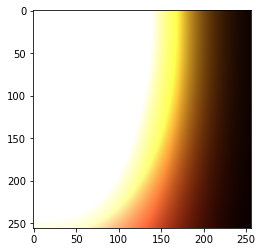

In [29]:
pic = pic.reshape((256, 256, 3))

print(np.min(pic))

plt.figure()
plt.imshow(pic)

In [303]:
print(csTest.shape)

np.max(csTest, 1)

(3, 33)


array([0.6624248, 0.9589894, 0.8264813], dtype=float32)

In [297]:
np.min(Newskincolour)

7.919792e-18

In [326]:
skinColor.repeat((3, 1, 1, 1)).shape

torch.Size([3, 256, 256, 33])

In [42]:
cameraSensitivityData.shape

(3, 33, 28)

In [48]:
torch.sum(pcaComponents[:33,0] ** 2)

tensor(1.)